These file contains the code which shows how a small increase in the baseline expression of either component of the system can modulate the heteroegenity of the activation. This file pretty much contains the same information as the "Leaky Overexpression Behaviour" section of the main simulations file, but formated a bit differently (to fit with the corresponding figure in the article). 

# Preparations

### Fetch Packages and Files

In [1]:
# Fetch the required julia packages (packages can be added by "> using Pkg, Pkg.add("PackageName")").
using DiffEqBase
using DiffEqJump
using Plots
using Plots.Measures
using Serialization
using Statistics
gr(); default(fmt = :png);

In [2]:
# Loads the files with the required functions for this project.
include("Functions/sigV_model.jl")     # This file declares the model.
include("Functions/simulate.jl")       # This fule contains the functions for simulating the model.
include("Functions/make_plots.jl");    # This file contains the function for creating the plots.
include("Functions/make_csvs.jl");     # This file contains the function for re-saving simulations as csv files (if one wishes to access them from other programming langauges).

### Sets File Destination

In [3]:
# Sets folder where the simulations are saved.
data_folder = "../Data/";

In [4]:
# Sets folder where the figures are saved.
figure_folder = "../Figures/" ;

### Set Parameters

In [5]:
v0 = 0.1; v = 2.5; K = 60; n = 2;
kD = 5; kB = 10; kC = 0.05;
deg = 0.01; L = 0.; 
p = [v0,v,K,n,kD,kB,kC,deg,L];

# Analysis

## Standard Behaviour

In [6]:
m = 100;
l = 4000.;
increased_baseline_amounts = 0.01:0.01:0.2;

 16.289647 seconds (7.31 M allocations: 424.724 MiB, 0.98% gc time)


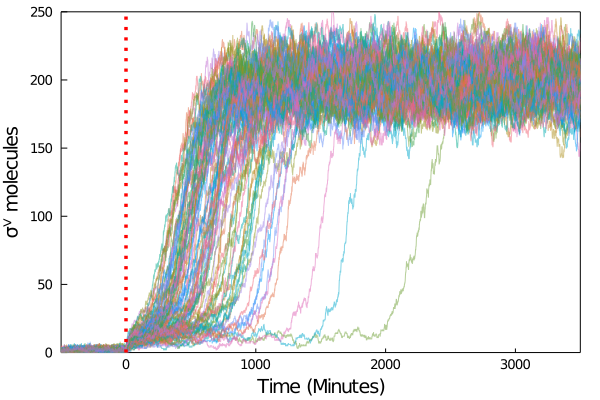

In [7]:
# Simulates the wildtype activation (for reference).
@time sols_WT = ssa_monte(p,(-500.,l-500.),m,((0.,1.),));
serialize(data_folder*"increased_baseline_expression/wt_activation.jls",sols_WT)
plot_sims(sols_WT,ylimit=(0,250)); plot_stress_pattern!([0],[],250)    # Only plots to see how they look like.

In [8]:
# Simulates the effect of increase in baseline SigV.
@time for iba in increased_baseline_amounts
    SigV_iba_p = vcat(copy(p),[iba,0.])
    sols_internal = ssa_monte(SigV_iba_p,(-500.,l - 500.),m,((0.,1.),),jumps=jumps_inducible);
    serialize(data_folder*"increased_baseline_expression/SigV/sols_baseline_increase_"*string(iba)*".jls",sols_internal)
end

503.483212 seconds (19.06 M allocations: 1.644 GiB, 0.09% gc time)


In [9]:
# Simulates the effect of increase in baseline RsiV.
@time for iba in increased_baseline_amounts
    RsiV_iba_p = vcat(copy(p),[0.,iba])
    sols_internal = ssa_monte(RsiV_iba_p,(-500.,l - 500.),m,((0.,1.),),jumps=jumps_inducible);
    serialize(data_folder*"increased_baseline_expression/RsiV/sols_baseline_increase_"*string(iba)*".jls",sols_internal)
end

448.562570 seconds (16.76 M allocations: 1.530 GiB, 0.08% gc time)


In [10]:
# Feteches the data of the increase baseline activations (and the WT, if you want to use the simulated value, just comment out that line).
sols_WT = deserialize(data_folder*"increased_baseline_expression/wt_activation.jls")
increased_baseline_SigV_sols = map(iba -> deserialize(data_folder*"increased_baseline_expression/SigV/sols_baseline_increase_"*string(iba)*".jls"), increased_baseline_amounts)
increased_baseline_RsiV_sols = map(iba -> deserialize(data_folder*"increased_baseline_expression/RsiV/sols_baseline_increase_"*string(iba)*".jls"), increased_baseline_amounts);

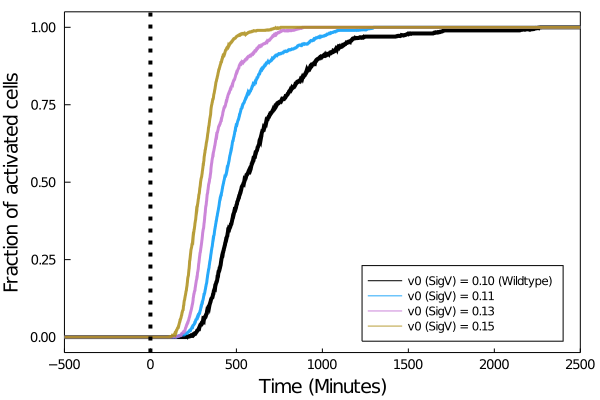

In [11]:
# Makes the cummulative activation plots for increased baseline SigV activity.
selected_baselines_SigV = [1,3,5]
v0_baseline_SigV = [0.11, 0.13, 0.15]
colors = [RGB{Float64}(0.5,0.05,0.0), RGB{Float64}(0.75,0.,0.25), RGB{Float64}(1.00,0.,0.)]
colors = [palette(:default)[1],palette(:default)[4:5]...]
cummulative_activation_plot(sols_WT,50,100,label="v0 (SigV) = 0.10 (Wildtype)",lw=4,color=:black)
for (j,i) in enumerate(selected_baselines_SigV)
    cummulative_activation_plot!(increased_baseline_SigV_sols[i],50,100,label="v0 (SigV) = $(v0_baseline_SigV[j])",lw=3,linealpha=0.85,color=colors[j])
end
increase_SigV_baseline_plot = plot!([0.,0.],[-0.05,1.05],color=:black,lw=4,linestyle=:dot,label="",ylimit=(-0.05,1.05), xlimit = (-500,2500))

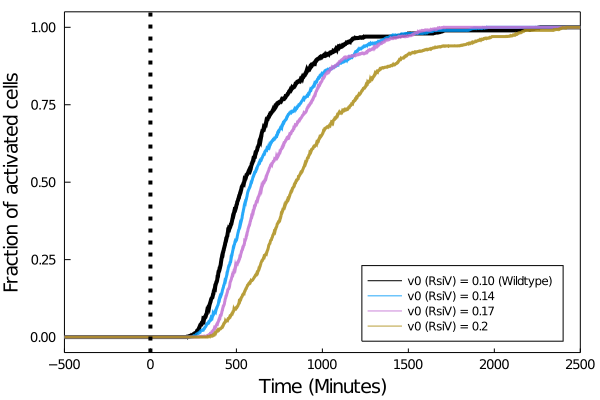

In [24]:
# Makes the cummulative activation plots for increased baseline RsiV activity.
selected_baselines_RsiV = [4,7,10]
v0_baseline_RsiV = [0.14,0.17,0.20]
colors = [RGB{Float64}(0.05,0.4,0.0), RGB{Float64}(0.35,0.75,0.), RGB{Float64}(0.,1.00,0.)]
colors = [palette(:default)[1],palette(:default)[4:5]...]
cummulative_activation_plot(sols_WT,50,100,label="v0 (RsiV) = 0.10 (Wildtype)",lw=4,color=:black)
for (j,i) in enumerate(selected_baselines_RsiV)
    cummulative_activation_plot!(increased_baseline_RsiV_sols[i],50,100,label="v0 (RsiV) = $(v0_baseline_RsiV[j])",lw=3,linealpha=0.85,color=colors[j])
end
increase_RsiV_baseline_plot = plot!([0.,0.],[-0.05,1.05],color=:black,lw=4,linestyle=:dot,label="",ylimit=(-0.05,1.05), xlimit = (-500,2500))

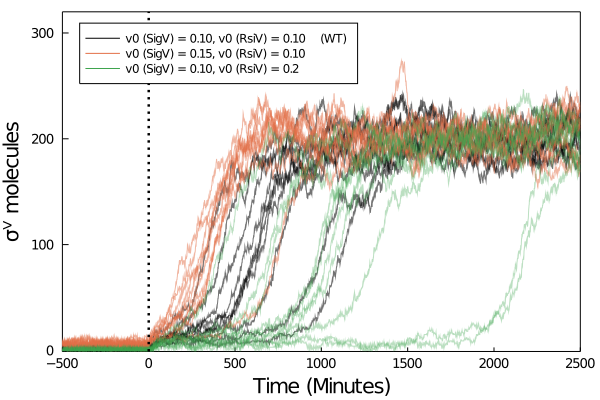

In [25]:
# Plots the heterogeneous activation for WT, a system with increased baseline SigV, and a system with increased baseline RsiV.
SigV_idx = 5
RsiV_idx = 10
plot_sims(sols_WT[1:10],color=:black,linealpha=0.55); plot!([],[],color=:black,lw=2,label="v0 (SigV) = 0.10, v0 (RsiV) = 0.10    (WT)")
plot_sims!(increased_baseline_SigV_sols[SigV_idx][1:10],color=palette(:default)[2],linealpha=0.5); plot!([],[],color=palette(:default)[2],lw=2,label="v0 (SigV) = $(0.15), v0 (RsiV) = 0.10")
plot_sims!(increased_baseline_RsiV_sols[RsiV_idx][1:10],color=palette(:default)[3],linealpha=0.35); plot!([],[],color=palette(:default)[3],lw=2,label="v0 (SigV) = 0.10, v0 (RsiV) = $(0.20)",legend=:topleft,legendfontsize=8)
activation_baseline_increased_plot = plot!([0.,0.],[-1,320],linestyle=:dot,color=:black,lw=2.5,label="",ylimit=(-1,320.),xlimit=(-500.,2500.),guidefontsize=14)

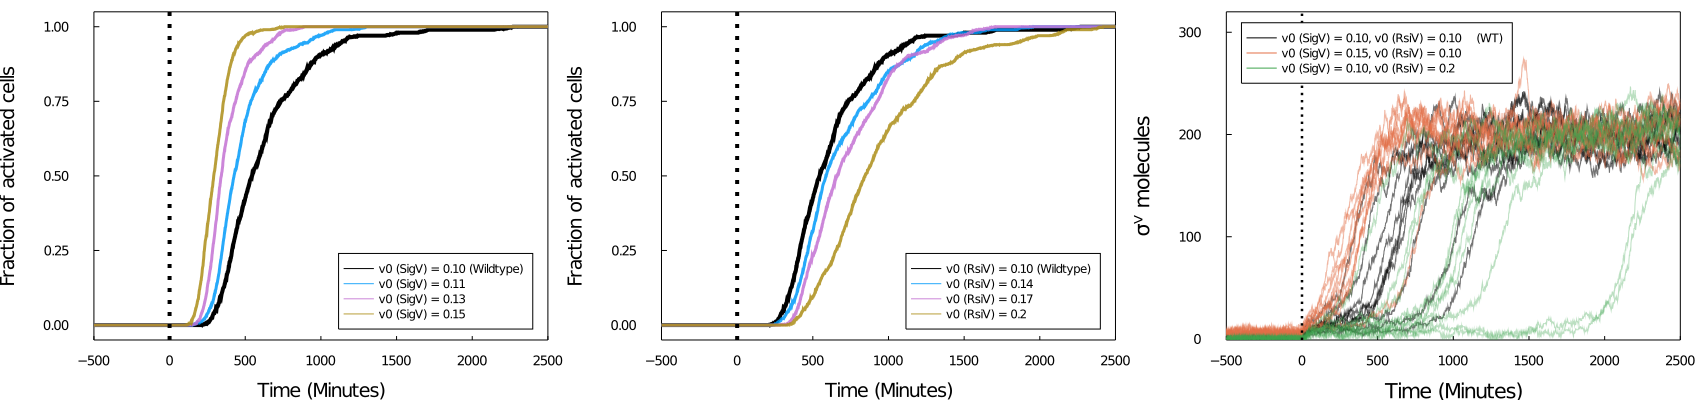

In [26]:
# Combines the three plots into a single one.
effect_of_increase_in_baseline_plot = plot(increase_SigV_baseline_plot,increase_RsiV_baseline_plot,activation_baseline_increased_plot,size=(1700,400),layout=(1,3),left_margin=8mm,bottom_margin=8mm)

In [27]:
#Saves the plot.
savefig(effect_of_increase_in_baseline_plot,figure_folder*"increased_baseline_expression/effect_of_increase_in_baseline.png")
savefig(effect_of_increase_in_baseline_plot,figure_folder*"increased_baseline_expression/effect_of_increase_in_baseline.svg")

# Save Simulats as CSV

Since csv files can be more commonly read outside of the julia programming language, this section simply loads the simulation files, and re-saves them as csv files. The script only saves the value of the SigV variable, but this can be changed to either saving the RsiV or the SigV-RsiV variable. The csv saving function loads the target julia file from the data folder, and then resave it as csv (does not need to be in memory).

The csv files are structured as follow. Each csv file corresponds to one monte-carlo simulation from a model (all simulations drawn from the same distribution). The first line contains all of the time points. Then follows one line for each simulation (typically 100). The line contains comma-separated values with the amount of the component at that time point (the component is determined by which components are saved using the "vars" option, files have an appended "_SigV",  "_RsiV", or "_SigVRsiV", denoting which component int contains. 

In [18]:
# Selects which variable we wishes to save (and how we wish to change the file name correspondingly).
vars = [1];    # Selects for which variable we wishes to create csv files. 1 corresponds to SigV, 2 to RsiV, and 3 to SigV-RsiV. The vector can have several (e.g. for "vars = [1,2]" we would create files for both SigV and RsiV).

In [19]:
resave_as_cvs(data_folder*"increased_baseline_expression/","wt_activation",vars=vars)
for iba in increased_baseline_amounts
    resave_as_cvs(data_folder*"increased_baseline_expression/SigV/","sols_baseline_increase_"*string(iba),vars=vars)
    resave_as_cvs(data_folder*"increased_baseline_expression/RsiV/","sols_baseline_increase_"*string(iba),vars=vars)
end